# Lab - Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from sklearn.linear_model import LinearRegression

## Linear Regression from scratch

### Import data

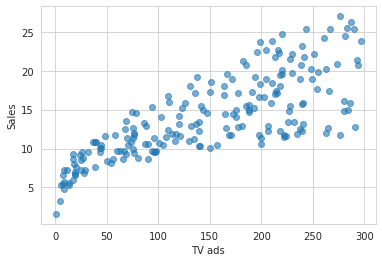

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/linear_regression.csv')

X = df[['TV']].values
y = df[['Sales']].values

plt.scatter(X, y, alpha=0.6)
plt.xlabel('TV ads')
plt.ylabel('Sales')
plt.show()

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Implement Linear Regression with sklearn

We will build a Linear Regression model to predict `Sales` from the other features. Let's start with a Simple Linear Regression first: Use `TV` to predict `Sales`. We build the model using `sklearn.linear_model.LinearRegression` first, so that we can compare our result later on:

Coef: [[0.04753664]]
Intercept: [7.03259355]
MSE: 10.512652915656757


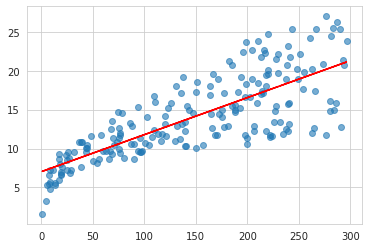

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lg = LinearRegression()
lg.fit(X, y)

print(f'Coef: {lg.coef_}')
print(f'Intercept: {lg.intercept_}')
print(f'MSE: {mean_squared_error(y, lg.predict(X))}')

plt.scatter(X, y, alpha=0.6)
plt.plot(X, lg.predict(X), c='r')

plt.show()

### Implement from scratch

**Gradient Descent algorithm:**

1. Initialize $w^0$, $b^0$
2. Repeate until converge: $\begin{cases} 
w^{t+1}_j = w^t_j - \alpha\frac{\partial L}{\partial w_j} & for\ j \in \{1, \dots, n\}\\
b^{t+1} = b^t - \alpha\frac{\partial L}{\partial b}
\end{cases}$

In [ ]:
# Initialization
def initialize_params(X):
    '''Initialize w and b with zeros and return them. Note that b should be np.array of shape (1,1)'''
    m,n = X.shape
    w = np.zeros((n,1))
    b = np.array([[0.0]])
    return w, b

# Standardization
# Skip this for now
x_mean = X.mean()
x_std = X.std()
X_scaled = (X - x_mean)/x_std



**Forward Propagation:**

$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b = b + \sum^n{w_ix_i} = w^Tx + b
$$

Vectorization (matrix multiplication)
$$
\hat{y} = Xw + b
$$

In [ ]:
# Function for forward propagation
def forward(X, w, b):
    '''Return y_hat'''
    y_hat = X @ w + b
    # Your code here

    return y_hat
    

**Loss function:**

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2}
$$

In [ ]:
# Funnction to calculate mean squared error
def mse(y_hat, y):
    # Your code here
    # L = mean_squared_error(y, y_hat)
    m,n = X.shape
    L = (1/m)*np.sum((y_hat -y)**2)
    return L

**Backward Propagation:**

$$
\nabla{L} = \frac{\partial L}{\partial w} = \frac{2}{m} X^T . (\hat{y} - y)
$$
<br/>
$$
\frac{\partial L}{\partial b} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})}
$$

In [ ]:
# Function for backward propagation
def backward(X, y, y_hat, w, b):
    '''Calculate dw, db and return them'''
    m,n = X.shape
    dw = (2/m)*(X.T @ (y_hat - y))
    db = (2/m)*np.sum((y_hat-y), keepdims=True)
    return dw, db

# Update parameters
def update_params(w, b, dw, db, learning_rate):
    '''Update w, b and return them'''
    w = w - learning_rate * dw
    b = b - learning_rate * db


    return w, b

**Train model**

In [ ]:
# Function for training model
def train(X, y, iterations, learning_rate):
    '''Train w, b and return'''
    # Your code here

    # Step 1: initialize the parameters
    w,b = initialize_params(X)
    # Step 2:
    for i in range(iterations):
      # Step 2a: forward pass
      y_hat = forward(X, w, b)
      # Step 2b: calculate loss
      L = mse(y_hat, y)
      # Step 2c: backward pass
      dw, db = backward(X, y, y_hat, w, b)
      # Step 2d: update params
      w, b = update_params(w, b, dw, db, learning_rate)

      if i % 100 == 0:
        print(f'Step {i}, MSE = {L}')

    return w, b

In [ ]:
# Setup learning rate & number of iterations
# Your code here
learning_rate = 0.000001
iterations = 1000

# train the model
# Your code here
w, b = train(X, y, iterations=iterations, learning_rate=learning_rate)

Step 0, MSE = 223.71625
Step 100, MSE = 23.03814221474233
Step 200, MSE = 23.035552952300222
Step 300, MSE = 23.034284281681867
Step 400, MSE = 23.03301574827706
Step 500, MSE = 23.031747343384083
Step 600, MSE = 23.030479066989862
Step 700, MSE = 23.02921091908136
Step 800, MSE = 23.02794289964558
Step 900, MSE = 23.026675008669503


**Evaluation**

In [ ]:
# Prediction
def predict(X, w, b):
    '''Return predicted y with the input X'''
    return forward(X,w,b)

In [ ]:
# Calculate y_hat from X with the parameters w, b that you have trained
# Print out the MSE between y_hat and y
y_hat = predict(X, w, b)
print(mse(y_hat, y))

23.025407246140112


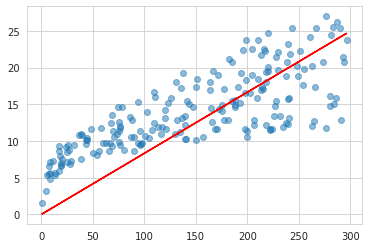

In [ ]:
# Plot the data with your model
plt.scatter(X, y, alpha=0.5) # the data
plt.plot(X, y_hat, c='r') # the prediction
plt.show()

In [ ]:
# Print out the value of w and b
print('Coef:', w)
print('Intercept:', b)

Coef: [[0.08322969]]
Intercept: [[0.00398408]]


In [ ]:
# Output from sklearn model
# Coef: [[0.04753664]]
# Intercept: [7.03259355]
# MSE: 10.512652915656757

## Multiple Linear Regression

Now let's move on to use all of the features to predict `Sales`

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df[['Sales']].values

In [ ]:
# Standardization
n = X.shape[1]
x_mean = np.mean(X, axis = 0)
x_std = np.std(X, axis = 0)
X_scaled = (X - x_mean)/x_std
X = X_scaled

In [ ]:
# Train the model
learning_rate = 1e-2
iterations = 1000

w, b = train(X, y, iterations=iterations, learning_rate=learning_rate)

Step 0, MSE = 223.71625
Step 100, MSE = 6.690824959092898
Step 200, MSE = 2.8634788491760594
Step 300, MSE = 2.7863351484203895
Step 400, MSE = 2.7842254029659927
Step 500, MSE = 2.7841325249785025
Step 600, MSE = 2.784126755343399
Step 700, MSE = 2.784126346881965
Step 800, MSE = 2.784126316907958
Step 900, MSE = 2.7841263146887885


In [ ]:
# Print out w and b
print('Coef:', w) # Only use for X_scale, not for X
print('Intercept:', b)

Coef: [[ 3.91925363]
 [ 2.79205955]
 [-0.02253541]]
Intercept: [[14.02249998]]


In [ ]:
# Print out the mse of the model after training
mse(predict(X, w, b), y)

2.7841263145241384

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Compare with the model from sklearn
model = LinearRegression()
model.fit(X, y)

print(f'MSE: {mean_squared_error(y, model.predict(X))}')

MSE: 2.784126314510936


In [ ]:
# Coef: [[ 3.91792832]
#  [ 2.78417674]
#  [-0.01432754]]